<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/classification-NN-modeling/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another.

A few types of classification problem:
*  Binary Classification.
*  Multiclass Classification.
*  Multilabel Classification.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
x.shape

(1000, 2)

In [3]:
x[:10,:]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y.shape

(1000,)

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualizing the data

In [6]:
import pandas as pd
circles = pd.DataFrame({'X0': x[:, 0], 'X1': x[:, 1], 'label': y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


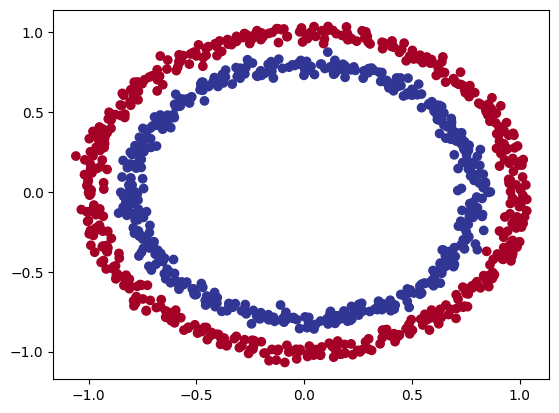

In [7]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

📖Exercise for understanding the **hyperparameter** tuning
[playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.55711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

## Getting data ready

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x_train.shape, y_train.shape

((800, 2), (800,))

In [10]:
x_test.shape, y_test.shape

((200, 2), (200,))

## Building model to train

In [11]:
import tensorflow as tf

### Testing with model_1

In [12]:
# set the seed
tf.random.set_seed(42)

# creating model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])

# fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 4.0402 - accuracy: 0.4620
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 0.8653 - accuracy: 0.5100
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.6980 - accuracy: 0.5210
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5070
Epoch 5/5
32/32 [==============================] - 1s 28ms/step - loss: 0.6942 - accuracy: 0.4940


In [13]:
model_1.evaluate(x, y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.4750


[0.693412184715271, 0.4749999940395355]

### Testing with model_2

In [14]:
# set the seed
tf.random.set_seed(42)

# creating model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])

# fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(x, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6935118436813354, 0.5]

### Testing with model_3

In [16]:
# set the random seed
tf.random.set_seed(42)

# create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

# fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [17]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

**🧮Conclution of testing models:** It looks like our model is not learning enough to make good predictions. No matter what regularization we do it ends up with accuracy of 50%. Which is basically guessing.

So, what should be done further to resolve this issue.....

We need to visualize our data again in another perspective which may give us the notion of whats been wrong in our modeling.

### Visualizing the predictions

In [18]:
model_3.predict(x)[:10]

32/32 [==============================] - 0s 1ms/step


array([[14.331924],
       [ 9.93484 ],
       [ 9.82157 ],
       [12.324642],
       [10.573874],
       [12.043778],
       [13.663768],
       [14.165363],
       [ 9.139372],
       [13.923183]], dtype=float32)

In [19]:
# we will be using numpy.meshgrid()
# here is a short example of using meshgrid()
import numpy as np

na, nb = (5, 2)
a = np.linspace(0, 1, na)
b = np.linspace(0, 1, nb)
av, bv = np.meshgrid(a, b)
av, bv

(array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ]]),
 array([[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]]))

In [20]:
np.linspace(0, 1, 5), np.linspace(0, 1, 2)

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), array([0., 1.]))

In [21]:
def plot_decision_boundary(model, x, y):
  '''
  Plots the decision boundary created by a model predicting on x.
  '''
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # create x value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multiclass
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # we have to reshape our prediction to get then ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
binary classification


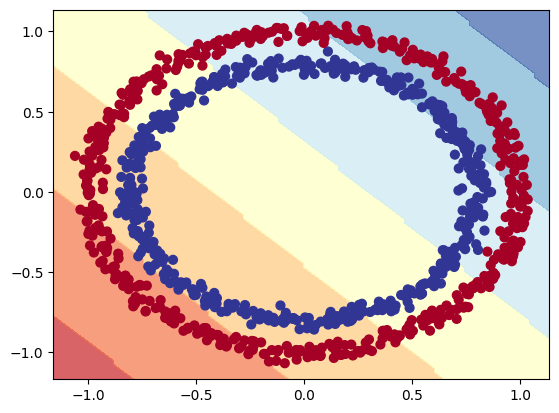

In [22]:
plot_decision_boundary(model=model_3, x=x, y=y)

**🧮Note:** It looks like the model is trying to draw a straight line to classify red and blue dots. But the data is aranged in a circular shape. That's why it not possible to saperate this kind of data with a regression line.

**🔑What is a regression problem?**

📖Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).
[Regression Problem](https://www.investopedia.com/terms/r/regression.asp)

### Checking if our model works on Regeression data

In [23]:
# set the random seed
tf.random.set_seed(42)

# creating some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)   # y = x + 100

# reshaping x_regression to pass into the model
x_regression = tf.reshape(x_regression, shape=(200,1))

# spliting our regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

**🔑NOTE:** model_3 is designed for Binary Classification. But, now we are dealing with regression problem. So, we need to change the loss function to MAE or MSE.

In [24]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.Adam(),
              metrics=['mae'])

model_4.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 400.7652 - mae: 400.7652
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 293.3655 - mae: 293.3655
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 189.1972 - mae: 189.1972
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 80.7985 - mae: 80.7985
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 61.9840 - mae: 61.9840
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 87.1828 - mae: 87.1828
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 66.5394 - mae: 66.5394
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.4017 - mae: 43.4017
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.3269 - mae: 49.3269
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 41.6050 - mae: 41.6050
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


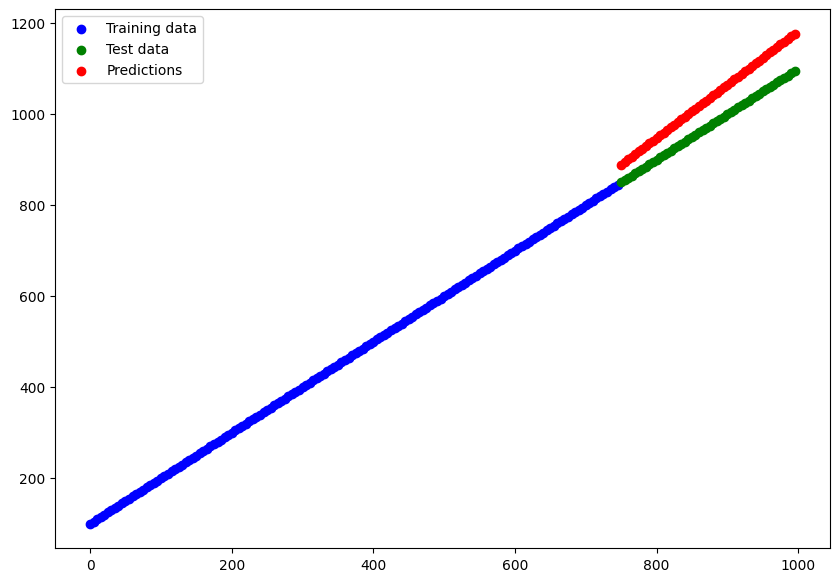

In [25]:
# make prediction with our trained model
y_reg_preds = model_4.predict(x_reg_test)

# plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

**🧮NOTE:** It looks like our model was trying to classify the classes by drawing a regression line but we have a circular shape of data, which is in a nonlinear shape. So it is not possible to classify this kind of data with regression line.

### Trying to solve non-linearity

In [40]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

model_5.fit(x, y, epochs=50, callbacks=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True))

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.5280
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5370
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5740
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.5970
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6300
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.6570
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7010
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7380
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7620
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7690
Epoch 11/50
32/32 [

In [41]:
test_accuracy = model_5.evaluate(x, y, verbose=0)
print(test_accuracy[1])

0.9929999709129333


313/313 [==============================] - 0s 1ms/step
binary classification


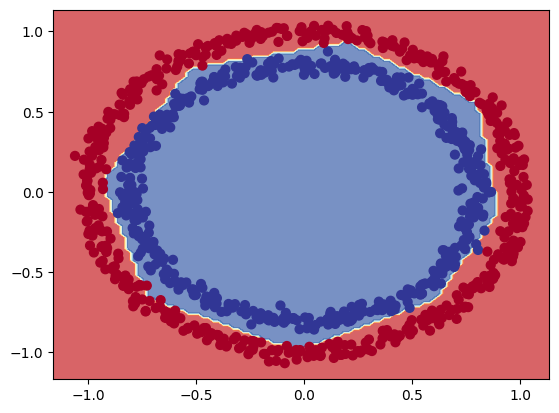

In [42]:
plot_decision_boundary(model=model_5, x=x, y=y)

🤔**Question:** What's wrong with the prediction we've made? Are we really evaluating our model correctly? Hint: What data did the model learn on and what data did we predict on?

🔑**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

## Linear and non-linear experiments

In [43]:
# create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

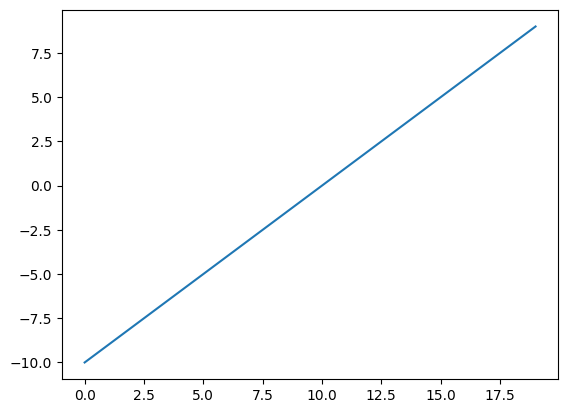

In [44]:
plt.plot(A)

### Applying `sigmoid` activation function on our toy dataset

In [45]:
# let's start by replacing sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

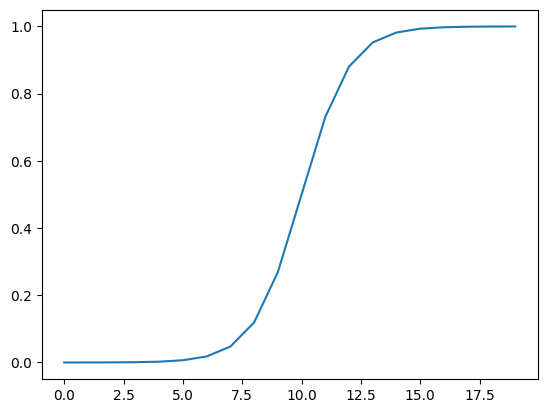

In [46]:
# plot the tensor transformed by our sigmoid() function
plt.plot(sigmoid(A))

**📖NOTE:** It looks like the sigmoid() activation function is transforming a straight line into non-straight line, which can give a model different perspective to learn patterns differently.

🧮**Back to our previous problems:** This was the main issue we were facing when we were dealing with circular shape of data. Our model was trying to classify the points by drawing a straight line. But when we introduced `sigmoid()` activation funciton in the output layer, the model's performance was accelerated by a great number.

### Applying `ReLU` activation function on our toy dataset

In [47]:
# let's recreate relu activation function
def relu(x):
  return tf.maximum(0, x)

In [48]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

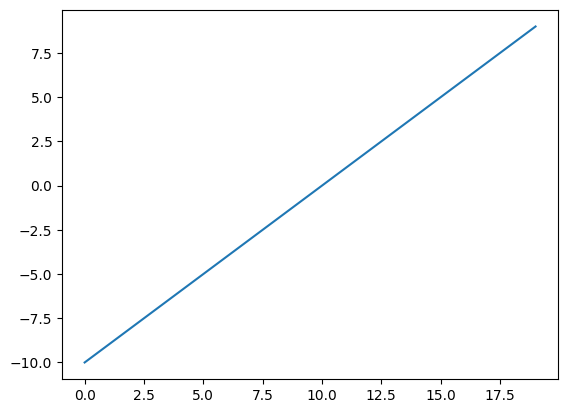

In [49]:
plt.plot(A)

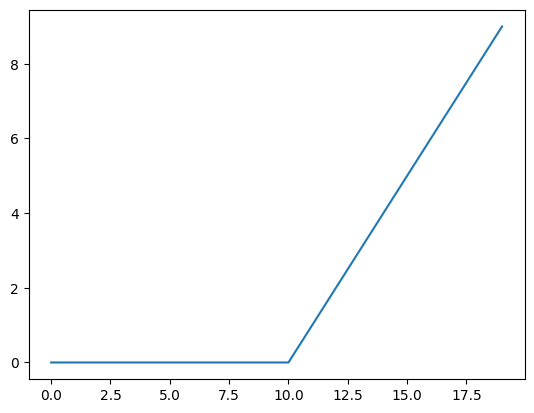

In [50]:
plt.plot(relu(A))

### Applying `Linear` activaiton function on our toy dataset

In [51]:
tf.keras.activations.linear(A), A == tf.keras.activations.linear(A)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=bool, numpy=
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])>)

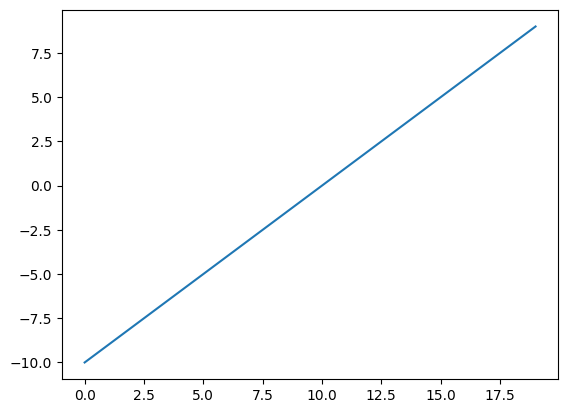

In [52]:
plt.plot(tf.keras.activations.linear(A))

It looks like `linear` activation function does not made any change on our toy dataset.

Here is the article regurding all activation functions we have covered so far.

[Activation Functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#)

## Evaluating and improving our classification model

So far we have been training and testing on the same dataset....

Now we will follow the 3 dataset way (train, test and validation)

In [54]:
# split into train and test set
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

# checking the length and shape of train and test set
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [70]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

callbacks = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)

history = model_6.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 12ms/step - loss: 0.6905 - accuracy: 0.5150 - val_loss: 0.6784 - val_accuracy: 0.5400
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5838 - val_loss: 0.6576 - val_accuracy: 0.5700
Epoch 3/15
25/25 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.6900 - val_loss: 0.5915 - val_accuracy: 0.6950
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.7713 - val_loss: 0.5802 - val_accuracy: 0.7500
Epoch 5/15
25/25 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.8087 - val_loss: 0.3827 - val_accuracy: 0.9000
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8863 - val_loss: 0.2826 - val_accuracy: 0.9600
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2565 - accuracy: 0.9375 - val_loss: 0.2067 - val_accuracy: 0.9750
Epoch 8/15
25/25 [=

In [71]:
# evaluating our models performance
eval_data = model_6.evaluate(x_test, y_test)

# printing the test accuracy
print(eval_data[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9900
0.9900000095367432


313/313 [==============================] - 1s 2ms/step
binary classification
313/313 [==============================] - 2s 5ms/step
binary classification


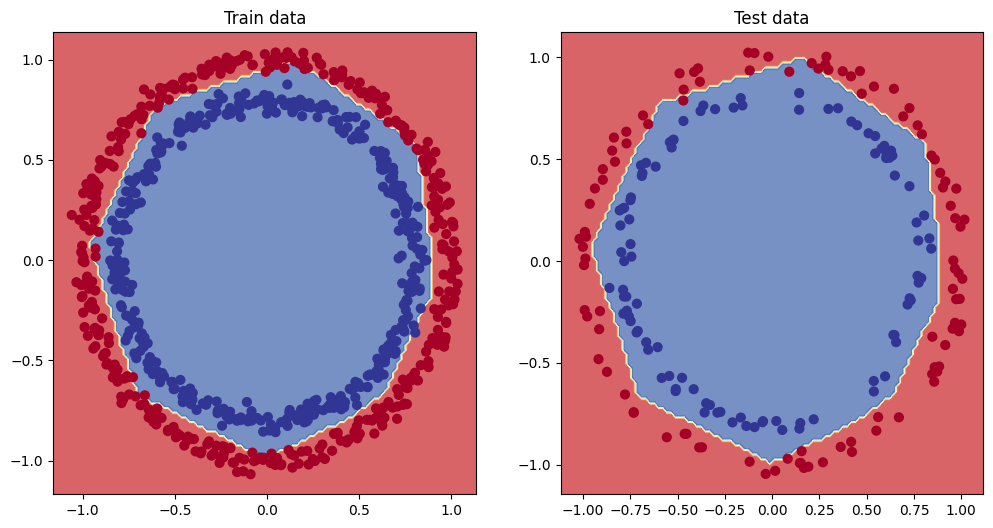

In [73]:
# ploting the dicision boundary for the training and test dataset
plt.figure(figsize=(12,6))

# ploting training set
plt.subplot(1, 2, 1)
plt.title('Train data')
plot_decision_boundary(model_6, x=x_train, y=y_train)

# ploting test set
plt.subplot(1, 2, 2)
plt.title('Test data')
plot_decision_boundary(model_6, x=x_test, y=y_test)
plt.show()

### Ploting history data

In [75]:
train_test_history = pd.DataFrame(history.history)
train_test_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.690532,0.51500,0.678415,0.540
1,0.678523,0.58375,0.657591,0.570
2,0.634663,0.69000,0.591498,0.695
3,0.544410,0.77125,0.580163,0.750
4,0.467243,0.80875,0.382720,0.900


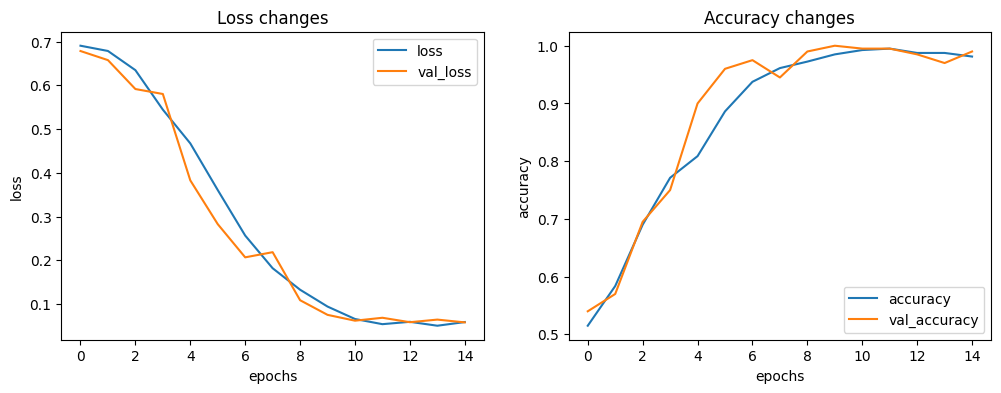

In [81]:
plt.figure(figsize=(12, 4))

# loss curve
plt.subplot(1, 2, 1)
train_test_history['loss'].plot()
train_test_history['val_loss'].plot()
plt.title('Loss changes')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# accuracy curve
plt.subplot(1, 2, 2)
train_test_history['accuracy'].plot()
train_test_history['val_accuracy'].plot()
plt.title('Accuracy changes')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - Extra pice of functionality that we can add during training.
* Another model.
* A modified loss curves plot.

In [82]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_7.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.5238 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5238 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5238 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5238 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5238 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5250 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5250 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5263 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='Learning Rate'>

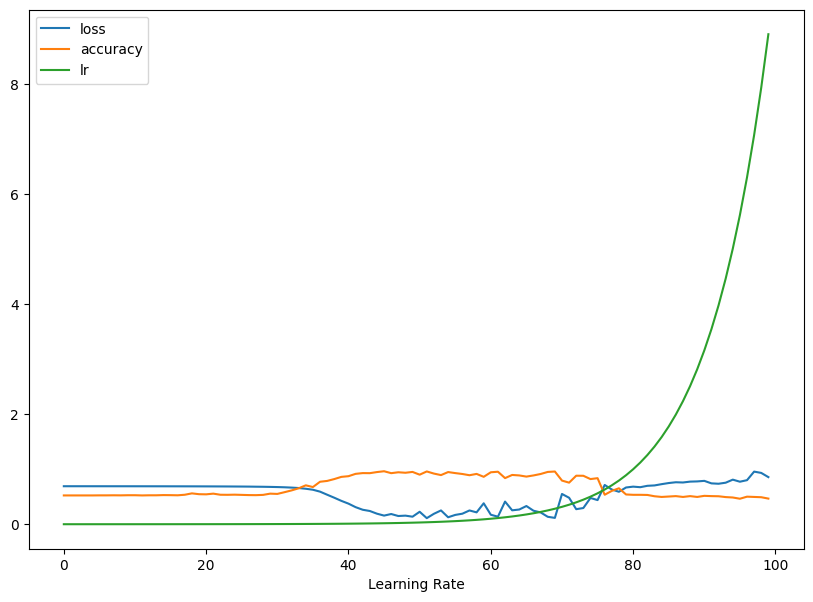

In [84]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='Learning Rate')

Text(0.5, 1.0, 'Learning rate vs. Loss')

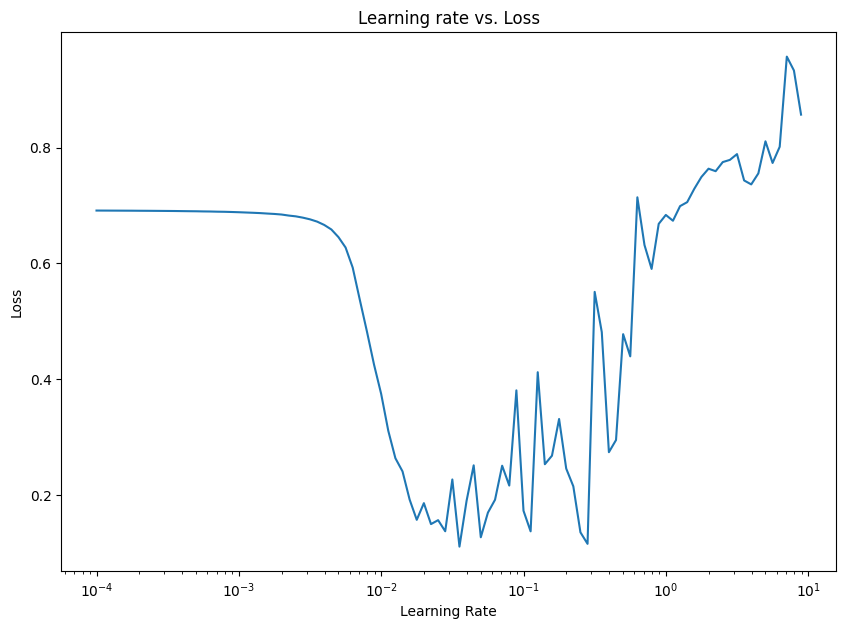

In [88]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))   # assuming different learning rates to experiment with
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

**🧮NOTE:** It looks like the `best learning_rate` is within the range of `10^-2 to 10^-1`. Because, loss is decreasing in a significat rate within this range. So, in order to find the best learning rate we can consider any values within this range.